<a href="https://colab.research.google.com/github/MSaberian/PyLearnMachineLearning/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data_train = pd.read_csv("train.csv")
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## preprocess

In [7]:
data_train = data_train.replace(["female", "male"], [0, 1])
data_train = data_train.replace(["S", "C", "Q"], [0, 1, 2])
data_train = data_train.fillna(0)
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0.0


In [8]:
X_total = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch"]])
Y_total = np.array(data_train[["Survived"]])

## Multilayer perceptron model

In [43]:
model = tf.keras.models.Sequential([
    Dense(5, activation="relu"),
    Dense(128, activation="tanh"),
    Dense(42, activation="selu"),
    Dense(10, activation="sigmoid"),#relu sigmoid selu
    Dense(2, activation="softmax")
])

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.losses.sparse_categorical_crossentropy,
              # loss=tf.losses.mean_squared_error
              metrics=['accuracy'])

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_total, Y_total, test_size=0.2, shuffle=True)

In [46]:
# train
train_output = model.fit(X_train, Y_train, epochs=400)

Epoch 1/400
23/23 [==============================] - 1s 2ms/step - loss: 0.6878 - accuracy: 0.5688
Epoch 2/400
23/23 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5969
Epoch 3/400
23/23 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.5969
Epoch 4/400
23/23 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.6039
Epoch 5/400
23/23 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6250
Epoch 6/400
23/23 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.6419
Epoch 7/400
23/23 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.6840
Epoch 8/400
23/23 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.7163
Epoch 9/400
23/23 [==============================] - 0s 3ms/step - loss: 0.5372 - accuracy: 0.7416
Epoch 10/400
23/23 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7640
Epoch 11/

In [47]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

2/2 [==============================] - 0s 9ms/step - loss: 0.4132 - accuracy: 0.8380
test loss, test acc: [0.41320526599884033, 0.8379888534545898]


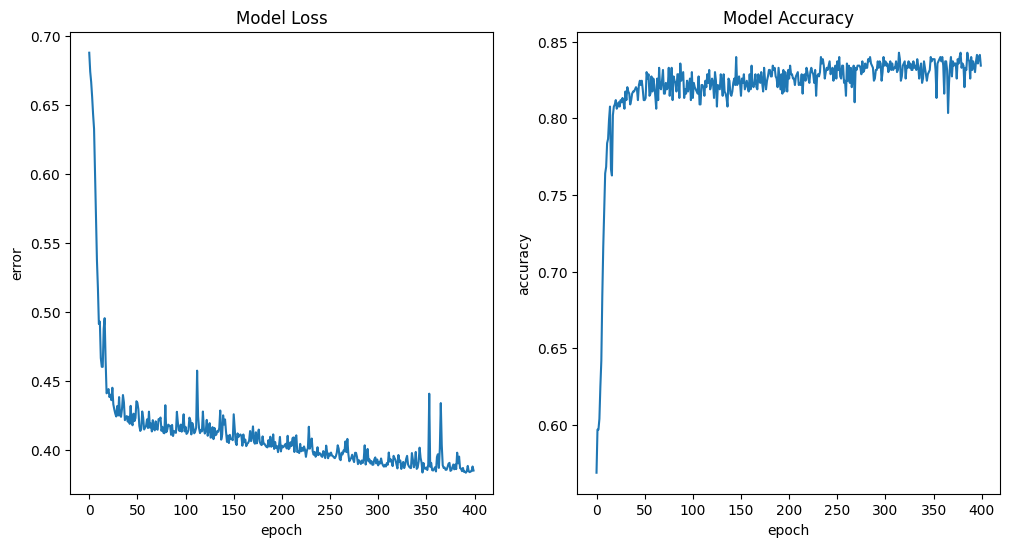

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(train_output.history['loss'])
ax1.set_title("Model Loss")
ax1.set_xlabel("epoch")
ax1.set_ylabel("error")

ax2.plot(train_output.history['accuracy'])
ax2.set_title("Model Accuracy")
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")

plt.show()

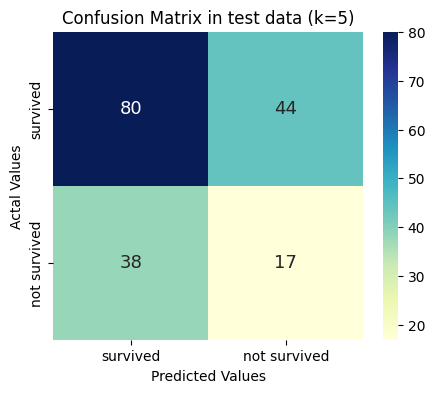

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sb

cm = confusion_matrix(Y_test, Y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['survived','not survived'],
                     columns = ['survived','not survived'])

plt.figure(figsize=(5,4))
sb.heatmap(cm_df, annot=True, fmt='d', annot_kws={'size':13}, cmap="YlGnBu")
plt.title('Confusion Matrix in test data (k=5)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [15]:
jack = np.array([[3, 1, 36, 0, 0]])

result = model.predict(jack)
print(np.argmax(result))

rose = np.array([[1, 0, 28, 0, 0]])

result = model.predict(rose)
print(np.argmax(result))

1/1 [==============================] - 0s 117ms/step
0
1/1 [==============================] - 0s 20ms/step
0


In [16]:
model.save("my_titanic.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model = tf.keras.models.load_model("my_titanic.h5")

## Perceptron model

In [18]:
model = tf.keras.models.Sequential([
    Dense(5, activation="relu"),
    Dense(2, activation="softmax")
])

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.losses.sparse_categorical_crossentropy,
              # loss=tf.losses.mean_squared_error
              metrics=['accuracy'])

In [20]:
train_output = model.fit(X_train, Y_train, epochs=400)

Epoch 1/400
23/23 [==============================] - 1s 2ms/step - loss: 1.4801 - accuracy: 0.4733
Epoch 2/400
23/23 [==============================] - 0s 2ms/step - loss: 1.0707 - accuracy: 0.4747
Epoch 3/400
23/23 [==============================] - 0s 2ms/step - loss: 0.8364 - accuracy: 0.4719
Epoch 4/400
23/23 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.4775
Epoch 5/400
23/23 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5646
Epoch 6/400
23/23 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6096
Epoch 7/400
23/23 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.6096
Epoch 8/400
23/23 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.6096
Epoch 9/400
23/23 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6081
Epoch 10/400
23/23 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.6447
Epoch 11/

In [21]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

2/2 [==============================] - 0s 8ms/step - loss: 0.4388 - accuracy: 0.8045
test loss, test acc: [0.43878668546676636, 0.8044692873954773]


## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_sklearn = KNeighborsClassifier(n_neighbors=5)
knn_sklearn.fit(X_train, Y_train)
Y_pred = knn_sklearn.predict(X_test)
sum = np.sum(Y_pred.reshape(-1,1) == Y_test.reshape(-1,1))
len = Y_test.shape[0]
print(sum/len)

0.7597765363128491


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# final result

| Algurithm     | Accuracy      |
| :---   | :----  |
| KNN  | 76.0%  |
| Perceptron  | 80.4%  |
| MLP (Multi Layer Perceptron)  | 83.8%  |